In [1]:
import csv
import pandas as pd
import nltk
import string
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Shofi
[nltk_data]     Septyawardhani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Shofi
[nltk_data]     Septyawardhani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shofi
[nltk_data]     Septyawardhani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
full = pd.read_csv('data.csv')
data = pd.DataFrame(full[['Judul','Abstract']])

In [3]:
def Preprocessing(texts):
    word = []
    for text in texts:
        #CaseFolding
        lower_sentence = text.lower()
        #Tokenizing
        remove_number = re.sub(r"\d+", "", lower_sentence)
        remove_whitespace = re.sub("\s+", " ", remove_number)
        remove_punctuation = remove_whitespace.translate(str.maketrans("", "", string.punctuation))
        result_tokenizing = remove_punctuation
        #many_tokens = nltk.FreqDist(tokens)
        #print(many_tokens.most_common())
        #Filtering/Stopword
        factory_stopword = StopWordRemoverFactory()
        stopword = factory_stopword.create_stop_word_remover()
        result_stopword = stopword.remove(result_tokenizing)
        #Stemming
        factory_stemming = StemmerFactory()
        stemmer = factory_stemming.create_stemmer()
        result_stemming = stemmer.stem(result_stopword)
        tokens = nltk.word_tokenize(result_stemming)
        word.append(tokens)
    return word

In [4]:
abstract = data['Abstract']
data['Abstract Bersih'] = Preprocessing(abstract)

In [5]:
data['Abstract Bersih']

0      [goatzilla, farm, ada, senduro, kabupaten, lum...
1      [informasi, milik, manfaat, alat, ambil, putus...
2      [jasa, raharja, rupa, buah, badan, usaha, mili...
3      [kembang, trasnportasi, online, sangat, mudah,...
4      [klikindomaret, rupa, inovasi, indomaret, upa,...
                             ...                        
395    [erfa, busana, addimyati, rupa, buah, usaha, k...
396    [smpn, sukowono, rupa, salah, satu, sekolah, u...
397    [koperasi, salah, satu, bentuk, organisasi, pe...
398    [lokasi, rupa, salah, satu, aspek, baur, pasar...
399    [rayon, jember, kota, rupa, salah, satu, rayon...
Name: Abstract Bersih, Length: 400, dtype: object

In [6]:
df = pd.DataFrame(data[['Judul', 'Abstract Bersih']])

In [7]:
df.rename(columns={'Abstract Bersih':'Abstract'}, inplace=True)

In [8]:
#export to csv
df.to_csv('Clean.csv', index=False)
#export to excel
df.to_excel('Clean.xlsx', index=False)

In [9]:
def get_list_of_word(list_of_document):
    list_of_word = []
    for sentence in list_of_document:
        for word in sentence:
            if word not in list_of_word:
                list_of_word.append(word)
    return list_of_word

In [10]:
length_of_document = len(data['Abstract Bersih'])

In [11]:
list_of_word = get_list_of_word(data['Abstract Bersih'])

In [23]:
print(list_of_word)

['a', 'ab', 'abadi', 'abai', 'abc', 'abcven', 'abdi', 'abdullah', 'abg', 'about', 'absah', 'absensi', 'absolute', 'absorbansi', 'abstrak', 'acak', 'acara', 'acceleration', 'acceptance', 'accesoriesnya', 'access', 'account', 'accounting', 'accuracy', 'accurate', 'accuration', 'acfta', 'ach', 'achieved', 'achmad', 'aco', 'activity', 'actors', 'actual', 'acu', 'ad', 'ada', 'adalah', 'adam', 'adapaun', 'adaptasi', 'adaptive', 'adapun', 'add', 'addimyati', 'addition', 'additive', 'adi', 'adien', 'admin', 'adminduk', 'administrasi', 'administrator', 'adminstrasi', 'adopsi', 'adopted', 'adu', 'advance', 'advances', 'advisor', 'advokasi', 'aes', 'aestethic', 'aestetic', 'aesthetic', 'af', 'afandi', 'afc', 'afifah', 'afkir', 'afrika', 'after', 'agak', 'agam', 'agama', 'agar', 'age', 'agen', 'agenagen', 'agent', 'agoda', 'agraris', 'agricultura', 'agro', 'agroindustri', 'agroindustry', 'agrotechno', 'agrotechnopark', 'agun', 'agung', 'agustina', 'agustus', 'ahli', 'ahmad', 'ahp', 'ai', 'aims', '

In [12]:
def create_term_frequency(list_of_word, length_of_document):
    term_frequency = []
    
    for _ in range(length_of_document):
        term_frequency.append(dict(zip(list_of_word, [0 for _ in range(len(list_of_word))])))
    
    return term_frequency

In [13]:
term_frequency = create_term_frequency(list_of_word, length_of_document)

In [14]:
def create_document_frequency(list_of_word):
    return dict(zip(list_of_word, [0 for _ in range(len(list_of_word))]))

In [15]:
for index, sentence in enumerate(data['Abstract Bersih']):
    for word in sentence:
        if word in term_frequency[index]:
            term_frequency[index][word] += 1

In [16]:
document_frequency = create_document_frequency(list_of_word)

In [17]:
for index, sentence in enumerate(term_frequency):
    for key, value in sentence.items():
        if value:
            document_frequency[key] += 1

In [18]:
def get_d_df(length_of_document, document_frequency):
    d_df = {}
    for key, value in document_frequency.items():
        d_df[key] = length_of_document / value
    return d_df

In [19]:
d_df = get_d_df(length_of_document, document_frequency)

In [37]:
from math import log10

In [38]:
def get_idf(d_df):
    idf = {}
    for key, value in d_df.items():
        idf[key] = round(log10(value), 3)
    return idf

In [39]:
idf = get_idf(d_df)

In [41]:
def get_w_q_t(term_frequency, idf):
    w_q_t = []
    for index, document in enumerate(term_frequency):
        w_q_t.append({})
        for key, value in document.items():
            w_q_t[index][key] = value * idf[key]
    return w_q_t

In [42]:
w_q_t = get_w_q_t(term_frequency, idf)

In [47]:
datas = pd.DataFrame(w_q_t)

In [49]:
datas

,goatzilla,farm,ada,senduro,kabupaten,lumajang,salah,satu,usaha,agroindustri,...,thermovision,layer,tiang,sutm,kapling,attribut,menghasilka,export,pdf,csv
0,31.224,23.418,2.934,7.806,1.887,4.944,0.852,1.584,3.366,7.806,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.978,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.978,0.000,0.000,0.000,0.000,0.000,1.683,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.978,0.000,0.000,0.000,0.852,0.792,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.978,0.000,5.661,0.000,0.000,0.792,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000,0.000,1.956,0.000,5.661,4.944,0.852,0.792,5.049,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
396,0.000,0.000,0.978,0.000,1.887,0.000,0.852,0.792,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
397,0.000,0.000,0.978,0.000,1.887,0.000,1.704,1.584,10.098,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
398,0.000,0.000,0.000,0.000,11.322,0.000,0.852,0.792,33.660,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [50]:
#export to csv
datas.to_csv('Fix.csv', index=False)
#export to excel
datas.to_excel('Fix.xlsx', index=False)

In [57]:
from sklearn.cluster import KMeans
import sys
import matplotlib.pyplot as plt

In [54]:
x = datas.values

In [73]:
x_list = x.tolist()

In [55]:
inertia = []
for k in range(1, 10):
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    cluster_model.fit(x)
    inertia_value = cluster_model.inertia_
    inertia.append(inertia_value)

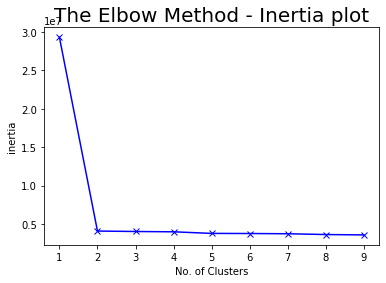

In [62]:
plt.plot(range(1, 10), inertia, 'bx-')
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('inertia')
plt.show()

In [63]:
true_k = 9
model = KMeans(n_clusters=true_k, random_state=24, init='k-means++', max_iter=200, n_init=10)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=24, tol=0.0001, verbose=0)

In [66]:
labels=model.labels_

In [65]:
from wordcloud import WordCloud